# Predicting Credit Risk
September 2016 <br>
Author: Peter Corniotes

This notebook contains Python code and visualizations.
<br> For further analysis, see my [blog](https://peterco877.github.io/)

### I. Data 

#### I(a). Loading Data

I(a)(1). import modules/display options

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_columns', 100)
pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

I(a)(2). load data

In [2]:
url1='https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/Training50.csv'
url2='https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/Test50.csv'
german = pd.read_csv(url1)
b = pd.read_csv(url2)
german = german.append(b)
german = german.reset_index(drop=True)
german.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/\
statlog/australian/australian.dat")
australia = pd.read_csv(target_url,header=None, sep=' ')
australia.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


#### I(b). Data Cleaning

In [4]:
german.columns = ['unnamed', 'Creditability', 'Account_Balance', 'Duration_of_Credit_month', 
                  'Payment_Status_of_Previous_Credit','Purpose', 'Credit_Amount', 
                  'Value_Savings_Stocks', 'Length_of_current_employment','Instalment_per_cent', 
                  'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 
                  'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits',
                  'Type_of_apartment', 'No_of_Credits_at_this_Bank','Occupation', 
                  'No_of_dependents', 'Telephone', 'Foreign_Worker']
del german['unnamed']
print 'shape', german.shape
german.head()

shape (1000, 21)


,Creditability,Account_Balance,Duration_of_Credit_month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
1,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
2,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
3,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
4,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [5]:
australia.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14',
                     'Creditability']
print 'shape', australia.shape
australia.head()

shape (690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Creditability
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account_Balance                      1000 non-null int64
Duration_of_Credit_month             1000 non-null int64
Payment_Status_of_Previous_Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit_Amount                        1000 non-null int64
Value_Savings_Stocks                 1000 non-null int64
Length_of_current_employment         1000 non-null int64
Instalment_per_cent                  1000 non-null int64
Sex_Marital_Status                   1000 non-null int64
Guarantors                           1000 non-null int64
Duration_in_Current_address          1000 non-null int64
Most_valuable_available_asset        1000 non-null int64
Age_years                            1000 non-null int64
Concurrent_Credits                   1000 non-null int64
Type_of_apartment                    10

In [7]:
australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A1               690 non-null int64
A2               690 non-null float64
A3               690 non-null float64
A4               690 non-null int64
A5               690 non-null int64
A6               690 non-null int64
A7               690 non-null float64
A8               690 non-null int64
A9               690 non-null int64
A10              690 non-null int64
A11              690 non-null int64
A12              690 non-null int64
A13              690 non-null int64
A14              690 non-null int64
Creditability    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [8]:
# number of unique values in each column
for i in german.columns:
    print i, german[i].nunique() 

Creditability 2
Account_Balance 3
Duration_of_Credit_month 33
Payment_Status_of_Previous_Credit 3
Purpose 4
Credit_Amount 923
Value_Savings_Stocks 4
Length_of_current_employment 4
Instalment_per_cent 4
Sex_Marital_Status 3
Guarantors 2
Duration_in_Current_address 4
Most_valuable_available_asset 4
Age_years 53
Concurrent_Credits 2
Type_of_apartment 3
No_of_Credits_at_this_Bank 2
Occupation 1
No_of_dependents 2
Telephone 2
Foreign_Worker 2


In [9]:
# number of unique values in each column
for i in australia.columns:
    print i, australia[i].nunique() 

A1 2
A2 350
A3 215
A4 3
A5 14
A6 8
A7 132
A8 2
A9 2
A10 23
A11 2
A12 3
A13 171
A14 240
Creditability 2


In [10]:
# delete column with only 1 unique value
del german['Occupation']
print 'shape', german.shape

shape (1000, 20)


#### I(c). Exploratory Data Analysis

I(c)(1). distinguish between continuous and qualitative features 

In [11]:
german_continuous = ['Age_years', 'Credit_Amount', 'Duration_of_Credit_month']

german_qualitative = ['Account_Balance', 'Concurrent_Credits', 'Duration_in_Current_address', 
                      'Foreign_Worker', 'Guarantors', 'Instalment_per_cent', 
                      'Length_of_current_employment', 'Most_valuable_available_asset', 
                      'No_of_Credits_at_this_Bank', 'No_of_dependents', 
                      'Payment_Status_of_Previous_Credit', 'Purpose', 'Sex_Marital_Status', 
                      'Telephone', 'Type_of_apartment', 'Value_Savings_Stocks']

In [12]:
australia_continuous = ['A2','A3','A7','A10','A13','A14']

australia_qualitative = ['A1','A4','A5','A6','A8','A9','A11','A12']

I(c)(2). histograms (german)

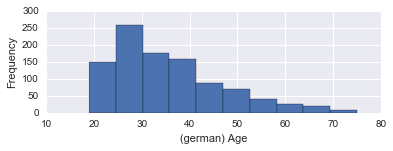

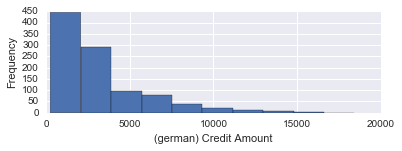

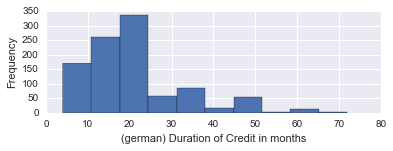

In [13]:
ages = german['Age_years']
amounts = german['Credit_Amount']
durations = german['Duration_of_Credit_month']
 
fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 1, 1)
n, bins, patches = ax1.hist(ages)
ax1.set_xlabel('(german) Age')
ax1.set_ylabel('Frequency')
 
fig2 = plt.figure()
ax2 = fig2.add_subplot(2, 1, 1)
n, bins, patches = ax2.hist(amounts)
ax2.set_xlabel('(german) Credit Amount')
ax2.set_ylabel('Frequency')
 
fig3 = plt.figure()
ax3 = fig3.add_subplot(2, 1, 1)
n, bins, patches = ax3.hist(durations)
ax3.set_xlabel('(german) Duration of Credit in months')
ax3.set_ylabel('Frequency')

I(c)(3). histograms (australia)

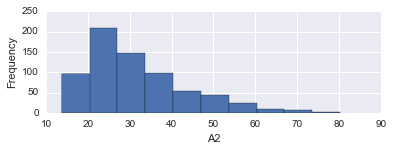

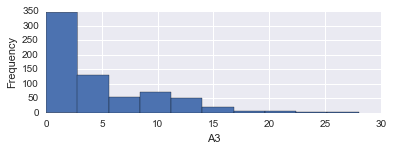

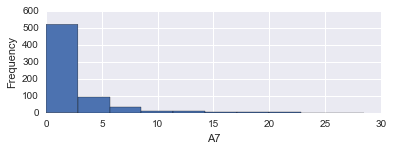

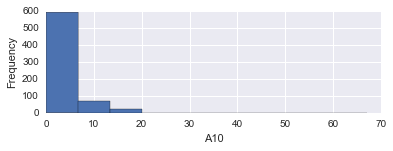

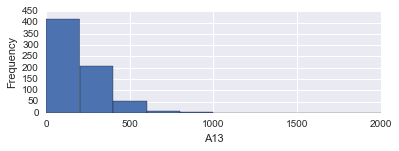

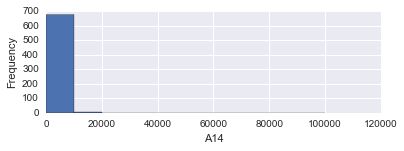

In [14]:
A2_list = australia['A2']
A3_list = australia['A3']
A7_list = australia['A7']
A10_list = australia['A10']
A13_list = australia['A13']
A14_list = australia['A14']

fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 1, 1)
n, bins, patches = ax1.hist(A2_list)
ax1.set_xlabel('A2')
ax1.set_ylabel('Frequency')

fig2 = plt.figure()
ax2 = fig2.add_subplot(2, 1, 1)
n, bins, patches = ax2.hist(A3_list)
ax2.set_xlabel('A3')
ax2.set_ylabel('Frequency')

fig3 = plt.figure()
ax3 = fig3.add_subplot(2, 1, 1)
n, bins, patches = ax3.hist(A7_list)
ax3.set_xlabel('A7')
ax3.set_ylabel('Frequency')

fig4 = plt.figure()
ax4 = fig4.add_subplot(2, 1, 1)
n, bins, patches = ax4.hist(A10_list)
ax4.set_xlabel('A10')
ax4.set_ylabel('Frequency')

fig5 = plt.figure()
ax5 = fig5.add_subplot(2, 1, 1)
n, bins, patches = ax5.hist(A13_list)
ax5.set_xlabel('A13')
ax5.set_ylabel('Frequency')

fig6 = plt.figure()
ax6 = fig6.add_subplot(2, 1, 1)
n, bins, patches = ax6.hist(A14_list)
ax6.set_xlabel('A14')
ax6.set_ylabel('Frequency')

I(c)(4). summary statistics

In [15]:
german[german_continuous].describe()

,Age_years,Credit_Amount,Duration_of_Credit_month
count,1000.00000,1000.00000,1000.000000
mean,35.54200,3271.24800,20.903000
std,11.35267,2822.75176,12.058814
min,19.00000,250.00000,4.000000
25%,27.00000,1365.50000,12.000000
50%,33.00000,2319.50000,18.000000
75%,42.00000,3972.25000,24.000000
max,75.00000,18424.00000,72.000000


In [16]:
australia[australia_continuous].describe()

,A2,A3,A7,A10,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000


I(c)(5). class size

In [17]:
#separate positive and negative classes 
german_positive_class = german.loc[german['Creditability'] == 1]
german_negative_class = german.loc[german['Creditability'] == 0]
australia_positive_class = australia.loc[australia['Creditability'] == 1]
australia_negative_class = australia.loc[australia['Creditability'] == 0]

#confirm number of rows in each class
print 'observations (rows) in german positive class', len(german_positive_class)
print 'observations (rows) in german negative class', len(german_negative_class)
print '\nobservations (rows) in australia positive class', len(australia_positive_class)
print 'observations (rows) in australia negative class', len(australia_negative_class)

observations (rows) in german positive class 700
observations (rows) in german negative class 300

observations (rows) in australia positive class 307
observations (rows) in australia negative class 383


### II. Feature Analysis & Selection

#### II(a). Feature Analysis & Selection - Continuous Attributes

II(a)(1). hypothesis tests for 2 population means (german) 

In [18]:
alpha = 0.0026   # 0.05 signifiance level / 19 hypothesis  
for feature in german_continuous:
    
    positive_class = german_positive_class[feature]
    negative_class = german_negative_class[feature] 
    print
    print feature

    #mean
    mu_1 = np.mean(positive_class)
    mu_2 = np.mean(negative_class)
    print "mean, german positive class", round(mu_1, 2)
    print "mean, german negative class", round(mu_2, 2)

    #standard deviation
    std_1 = np.std(positive_class)
    std_2 = np.std(negative_class)
    print "standard deviation, positive class", round(std_1, 2)
    print "standard deviation, negative class", round(std_2, 2)

    #standard error
    n_1 = len(positive_class)
    n_2 = len(negative_class)
    grp_1 = np.std(positive_class)**2 / n_1
    grp_2 = np.std(negative_class)**2 / n_2
    standard_err = np.sqrt(grp_1 + grp_2)
    print "standard error", round(standard_err, 2)

    #test statistic
    test_stat = (mu_1 - mu_2) / standard_err
    print "test statistic", round(test_stat, 3)

    #pvalue
    if test_stat < 0:
        pvalue = 2 * scipy.stats.norm.cdf(test_stat)   #two tailed (test stat is negative)
    else:
        pvalue = 2 * scipy.stats.norm.cdf(-test_stat)  #two tailed (test stat is positive)
    print "pvalue", round(pvalue, 4)

    #conclusion                            
    if pvalue <= alpha:
        print feature, "from german positive class is independent from", feature, \
        "in german negative class"
    else:
        print feature, "from german positive class is not independent from", feature, \
        "in german negative class"


Age_years
mean, german positive class 36.22
mean, german negative class 33.96
standard deviation, positive class 11.34
standard deviation, negative class 11.21
standard error 0.78
test statistic 2.912
pvalue 0.0036
Age_years from german positive class is not independent from Age_years in german negative class

Credit_Amount
mean, german positive class 2985.44
mean, german negative class 3938.13
standard deviation, positive class 2399.78
standard deviation, negative class 3529.92
standard error 223.07
test statistic -4.271
pvalue 0.0
Credit_Amount from german positive class is independent from Credit_Amount in german negative class

Duration_of_Credit_month
mean, german positive class 19.21
mean, german negative class 24.86
standard deviation, positive class 11.07
standard deviation, negative class 13.26
standard error 0.87
test statistic -6.479
pvalue 0.0
Duration_of_Credit_month from german positive class is independent from Duration_of_Credit_month in german negative class


II(a)(2). hypothesis tests for 2 population means with respect to continuous features (australia) 

In [19]:
alpha = 0.003571   # 0.05 significance level / 14 hypothesis  
for feature in australia_continuous:
    
    positive_class = australia_positive_class[feature]
    negative_class = australia_negative_class[feature] 
    print
    print feature

    #mean
    mu_1 = np.mean(positive_class)
    mu_2 = np.mean(negative_class)
    print "mean, australia positive class", round(mu_1, 2)
    print "mean, australia negative class", round(mu_2, 2)

    #standard deviation
    std_1 = np.std(positive_class)
    std_2 = np.std(negative_class)
    print "standard deviation, positive class", round(std_1, 2)
    print "standard deviation, negative class", round(std_2, 2)

    #standard error
    n_1 = len(positive_class)
    n_2 = len(negative_class)
    grp_1 = np.std(positive_class)**2 / n_1
    grp_2 = np.std(negative_class)**2 / n_2
    standard_err = np.sqrt(grp_1 + grp_2)
    print "standard error", round(standard_err, 2)

    #test statistic
    test_stat = (mu_1 - mu_2) / standard_err
    print "test statistic", round(test_stat, 3)

    #pvalue
    if test_stat < 0:
        pvalue = 2 * scipy.stats.norm.cdf(test_stat)   #two tailed (test stat is negative)
    else:
        pvalue = 2 * scipy.stats.norm.cdf(-test_stat)  #two tailed (test stat is positive)
    print "pvalue", round(pvalue, 4)

    #conclusion                            
    if pvalue <= alpha:
        print feature, "from australia positive class is independent from", feature, \
        "in australia negative class"
    else:
        print feature, "from australia positive class is not independent from", feature, \
        "in australia negative class"


A2
mean, australia positive class 33.71
mean, australia negative class 29.85
standard deviation, positive class 12.75
standard deviation, negative class 10.77
standard error 0.91
test statistic 4.223
pvalue 0.0
A2 from australia positive class is independent from A2 in australia negative class

A3
mean, australia positive class 5.9
mean, australia negative class 3.84
standard deviation, positive class 5.46
standard deviation, negative class 4.33
standard error 0.38
test statistic 5.401
pvalue 0.0
A3 from australia positive class is independent from A3 in australia negative class

A7
mean, australia positive class 3.43
mean, australia negative class 1.26
standard deviation, positive class 4.11
standard deviation, negative class 2.12
standard error 0.26
test statistic 8.393
pvalue 0.0
A7 from australia positive class is independent from A7 in australia negative class

A10
mean, australia positive class 4.61
mean, australia negative class 0.63
standard deviation, positive class 6.31
stan

II(a)(3). remove continuous features with pvalue above threshold (eg, insignificant)

In [20]:
german_continuous.remove('Age_years')
australia_continuous.remove('A13')

del german['Age_years']
del australia['A13']

print 'shape (german)', german.shape
print 'shape (australia)', australia.shape

shape (german) (1000, 19)
shape (australia) (690, 14)


II(a)(4). check correlation between remaining continuous attributes - maximum correlation 0.62 (german) | 0.39 (australia)

In [21]:
correlation_matrix = pd.DataFrame(german[german_continuous].corr())
correlation_matrix

,Credit_Amount,Duration_of_Credit_month
Credit_Amount,1.000000,0.624988
Duration_of_Credit_month,0.624988,1.000000


In [22]:
correlation_matrix = pd.DataFrame(australia[australia_continuous].corr())
correlation_matrix

,A2,A3,A7,A10,A14
A2,1.000000,0.201315,0.392788,0.185574,0.018539
A3,0.201315,1.000000,0.298902,0.271207,0.123121
A7,0.392788,0.298902,1.000000,0.322330,0.051345
A10,0.185574,0.271207,0.322330,1.000000,0.063692
A14,0.018539,0.123121,0.051345,0.063692,1.000000


##### II(b). Feature Analysis & Selection - Qualitative Attributes

II(b)(1). contingency table functions

In [23]:
# create index - same index applies to all contingency tables
def add_creditability(table):
    
    #create column
    table['creditability'] = 0
    table['creditability'].iloc[0] = 'bad credit risk(0)'
    table['creditability'].iloc[1] = 'good credit risk(1)'
    table['creditability'].iloc[2] = 'column total'
    
    #set index equal to column, then delete column
    index = table['creditability']               
    table=table.set_index(index)                 
    del table['creditability'] 
    
    return table

In [24]:
def initialize_table(num_rows, num_cols):
    return[[1 for j in range(num_cols)] for i in range(num_rows)]

In [25]:
def update_column(A, col, final_col):
    r1 = round((A[0][col] / A[2][col]), 1)        # fill with percentage of row total
    r2 = round((A[1][col] / A[2][col]), 1)        # fill with percentage of row total     
    r3 = round((A[2][col] / A[2][final_col]), 1)  # fill with percentage of column total
    return r1, r2, r3

In [26]:
def convert_to_percent(table):
    x = pd.np.array(table)                      # convert dataframe to a numpy array
    num_cols = len(x[0])
    new_table = initialize_table(3, num_cols)   # create a new table with the same shape
    new_table[0][num_cols-1] = x[0][num_cols-1] # copy row totals 
    new_table[1][num_cols-1] = x[1][num_cols-1] # "  
    new_table[2][num_cols-1] = x[2][num_cols-1] # " 
    for i in range(num_cols-1):                 # fill remaining cells with percentages
        new_table[0][i], new_table[1][i], new_table[2][i] = update_column(x, i, num_cols-1)
    y = pd.DataFrame(new_table)                 # convert table to a dataframe
    y = add_creditability(y)                    # add index
    return y

In [27]:
def get_german_headings():  
    headings = [
    
    #Account_Balance
    ['no_account(1)', 'no_balance(2)', 'some_balance(3)'],

    #Concurrent_Credits
    ['other_banks_or_dept_stores(1)', 'none(2)'],  

    #Duration_in_Current_address    
    ['below_1yr(1)', '1_4yrs(2)', '4_7yrs(3)', 'above_7yrs(4)'],                    

    #Foreign_Worker
    ['yes(1)', 'no(2)'],

    #Guarantors  
    ['none(1)', 'yes(2)'],

    #Instalment_per_cent   
    ['above_35%(1)', '25%_35%(2)', '20%_25%(3)', 'below_20%(4)'],

    #Length_of_current_employment
    ['below_1yr(1)', '1_4yrs(2)', '4_7yrs(3)', 'above_7yrs(4)'],

    #Most_valuable_available_asset    
    ['none(1)', 'car(2)', 'life_insurance(3)', 'real_estate(4)'],

    #No_of_Credits_at_this_Bank   
    ['one(1)', 'more_than_one(2)'],                                                 

    #No_of_dependents
    ['3_or_more(1)', 'less_than_3(2)'],

    #Payment_Status_of_Previous_Credit
    ['some_problems(1)', 'paid_up(2)', 'no_problems(3)'],

    #Purpose
    ['new_car(1)', 'used_car(2)', 'home_related(3)', 'other(4)'],

    #Sex_Marital_Status    
    ['male_divorced/single(1)', 'male_married/widowed(2)', 'female(3)'],

    #Telephone    
    ['yes(1)', 'no(2)'], 

    #Type_of_apartment
    ['free(1)', 'rented(2)', 'owned(3)'], 

    #Value_Savings_Stocks
    ['none(1)', 'below_100_DM(2)', 'between_100_1000_DM(3)', 'above_1000_DM(4)']    
    ]

    return headings

In [28]:
def get_australia_headings():
    headings = [
    ['A1(0)', 'A1(1)'], 
    ['A4(1)', 'A4(2)', 'A4(3)'],
    ['A5(1)', 'A5(2)', 'A5(3)', 'A5(4)', 'A5(5)', 'A5(6)', 'A5(7)', 'A5(8)', 'A5(9)', \
     'A5(10)', 'A5(11)', 'A5(12)', 'A5(13)', 'A5(14)'],
    ['A6(1)', 'A6(2)', 'A6(3)', 'A6(4)', 'A6(5)', 'A6(7)', 'A6(8)', 'A6(9)'],
    ['A8(0)', 'A8(1)'], 
    ['A9(0)', 'A9(1)'],
    ['A11(0)', 'A11(1)'],
    ['A12(1)', 'A12(2)', 'A12(3)']
    ]
    return headings

In [29]:
# confirm that number of qualitative features equals the number of headings
headings1 = get_german_headings()
headings2 = get_australia_headings()
print len(german_qualitative), len(headings1) 
print len(australia_qualitative), len(headings2) 

16 16
8 8


II(b)(2). contingency tables/chi-square tests (german)

In [30]:
german_contingency_tables = []
german_chi_2_pvals = []
headings = get_german_headings()
df = german.copy()
for i in range(len(headings)):
    feature = german_qualitative[i]     # get feature from list of lists
    heading_list = headings[i]          # get headings from list of lists
    # create contingency table
    ct = pd.crosstab(df.Creditability, df[feature]).apply(lambda x: x, axis = 1)   
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(ct)    # get chi2 p-value
    german_chi_2_pvals.append(p)                                  # append chi2 p-values
    ct.columns = heading_list                                     # give names to columns

    # add row totals
    if len(heading_list) == 2:
        item1, item2 = heading_list[0], heading_list[1]
        ct['row_total'] = ct[item1] + ct[item2]
    if len(heading_list) == 3:
        item1, item2, item3 = heading_list[0], heading_list[1], heading_list[2]
        ct['row_total'] = ct[item1] + ct[item2] + ct[item3]
    if len(heading_list) == 4:
        item1, item2, item3, item4 = heading_list[0], heading_list[1], heading_list[2], \
        heading_list[3]
        ct['row_total'] = ct[item1] + ct[item2] + ct[item3] + ct[item4]
   
    heading_list.append('row_total')            # add heading for row total
    sum_row = ct[heading_list].sum()            # calculate column totals
    table_sum = pd.DataFrame(data=sum_row).T    # create dataframe of column totals
    ct = ct.append(table_sum)                   # append column totals to table
    ct = add_creditability(ct)                  # add index to table
    german_contingency_tables.append(ct)        # append to list of tables

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
# create a second table showing the percentage of class by feature, 
#    and percentage of feature as column total
german_contingency_tables_percent = []
headings = get_german_headings()
for i in range(len(headings)):
    ct_p = convert_to_percent(german_contingency_tables[i])     # change values to percentages
    columns_list = headings[i]                                  # rename columns
    columns_list.append('row_total')                            # "
    ct_p.columns = columns_list                                 # "
    german_contingency_tables_percent.append(ct_p)              # append to list of tables      

In [32]:
# print each contingency table and chi square test in alphabetical order by feature
for i in range(len(german_contingency_tables)):
    print '\n', '                    ', '\n', german_qualitative[i]
    print german_contingency_tables[i]
    print '\n', german_contingency_tables_percent[i], '\n'
    print 'chi-squared p-value:', round(german_chi_2_pvals[i], 3)
    if german_chi_2_pvals[i] <= 0.0026:   # 0.05 significance level / 19 hypothesis  
        print german_qualitative[i], "and Creditability are dependent" 
    else:
        print "This attribute is not significant"
    print '_________________________________________________________________________________'


                     
Account_Balance
                     no_account(1)  no_balance(2)  some_balance(3)  row_total
creditability                                                                
bad credit risk(0)             135            105               60        300
good credit risk(1)            139            164              397        700
column total                   274            269              457       1000

                     no_account(1)  no_balance(2)  some_balance(3)  row_total
creditability                                                                
bad credit risk(0)             0.5            0.4              0.1        300
good credit risk(1)            0.5            0.6              0.9        700
column total                   0.3            0.3              0.5       1000 

chi-squared p-value: 0.0
Account_Balance and Creditability are dependent
_________________________________________________________________________________

                     


II(b)(3). contingency tables/chi-square tests (australia)

In [33]:
australia_contingency_tables = []
australia_chi_2_pvals = []
headings = get_australia_headings()
df = australia.copy()
for i in range(len(headings)):
    feature = australia_qualitative[i]              # get feature from list of lists
    heading_list = headings[i]                      # get headings from list of lists
    # create contingency table
    ct = pd.crosstab(df.Creditability, df[feature]).apply(lambda x: x, axis = 1)   
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(ct)  # get chi2 p-value
    australia_chi_2_pvals.append(p)                             # append chi2 p-values
    ct.columns = heading_list                                   # give names to columns

    # add row totals
    if len(heading_list) == 2:
        item1, item2 = heading_list[0], heading_list[1]
        ct['row_total'] = ct[item1] + ct[item2]
    
    if len(heading_list) == 3:
        item1, item2, item3 = heading_list[0], heading_list[1], heading_list[2]
        ct['row_total'] = ct[item1] + ct[item2] + ct[item3]
    
    if len(heading_list) == 8:
        item1, item2, item3, item4, item5, item6, item7, item8 = heading_list[0],\
        heading_list[1], heading_list[2], heading_list[3], heading_list[4], heading_list[5],\
        heading_list[6], heading_list[7]
        
        ct['row_total']= ct[item1] + ct[item2] + ct[item3] + ct[item4] + ct[item5] + ct[item6]\
        + ct[item7] + ct[item8]

    if len(heading_list) == 14:
        item1, item2, item3, item4, item5, item6, item7, item8, item9, item10, item11, item12,\
        item13, item14 = heading_list[0], heading_list[1], heading_list[2], heading_list[3], \
        heading_list[4], heading_list[5], heading_list[6], heading_list[7], heading_list[8], \
        heading_list[9], heading_list[10], heading_list[11], heading_list[12], heading_list[13]

        ct['row_total'] = ct[item1] + ct[item2] + ct[item3] + ct[item4] + ct[item5] + ct[item6]\
        + ct[item7] + ct[item8] + ct[item9] + ct[item10] + ct[item11] + ct[item12] + ct[item13]\
        + ct[item14]     
   
    heading_list.append('row_total')            # add heading for row total
    sum_row = ct[heading_list].sum()            # calculate column totals
    table_sum = pd.DataFrame(data=sum_row).T    # create dataframe of column totals
    ct = ct.append(table_sum)                   # append column totals to table
    ct = add_creditability(ct)                  # add index to table
    australia_contingency_tables.append(ct)     # append to list of tables

In [34]:
# create a second table showing the percentage of class by feature, 
#     and percentage of feature as column total
australia_contingency_tables_percent = []
headings = get_australia_headings()
for i in range(len(headings)):
    ct_p = convert_to_percent(australia_contingency_tables[i])  # change values to percentages
    columns_list = headings[i]                                  # rename columns
    columns_list.append('row_total')                            # "
    ct_p.columns = columns_list                                 # "
    australia_contingency_tables_percent.append(ct_p)           # append to list of tables      

In [35]:
# print each contingency table and chi square test in alphabetical order by feature
for i in range(len(australia_contingency_tables)):
    print '\n', '                    ', '\n', australia_qualitative[i]
    print australia_contingency_tables[i]
    print '\n', australia_contingency_tables_percent[i], '\n'
    print 'chi-squared p-value:', round(australia_chi_2_pvals[i], 3)
    if australia_chi_2_pvals[i] <= 0.003571:   # 0.05 significance level / 14 hypothesis     
        print australia_qualitative[i], "and Creditability are dependent" 
    else:
        print "This attribute is not significant"
    print '_______________________________________________________________________________'


                     
A1
                     A1(0)  A1(1)  row_total
creditability                               
bad credit risk(0)     121    262        383
good credit risk(1)    101    206        307
column total           222    468        690

                     A1(0)  A1(1)  row_total
creditability                               
bad credit risk(0)     0.5    0.6        383
good credit risk(1)    0.5    0.4        307
column total           0.3    0.7        690 

chi-squared p-value: 0.777
This attribute is not significant
_______________________________________________________________________________

                     
A4
                     A4(1)  A4(2)  A4(3)  row_total
creditability                                      
bad credit risk(0)     118    265      0        383
good credit risk(1)     45    260      2        307
column total           163    525      2        690

                     A4(1)  A4(2)  A4(3)  row_total
creditability                            

II(b)(4). remove features with pvalue above threshold (eg, insignificant) 

In [36]:
remove_from_german = ['Duration_in_Current_address', 'Foreign_Worker', 'Guarantors', 
                      'Instalment_per_cent', 'No_of_Credits_at_this_Bank', 
                      'No_of_dependents', 'Sex_Marital_Status', 'Telephone']

remove_from_australia = ['A1', 'A11', 'A12']

for feature in remove_from_german:
    del german[feature]

for feature in remove_from_australia:
    del australia[feature]

print "shape (german)", german.shape 
print "shape (australia)", australia.shape    

shape (german) (1000, 11)
shape (australia) (690, 11)


##### II(c). Set Target Variable

II(c)(1). set target variable

In [37]:
y1 = german['Creditability']        
y2 = australia['Creditability']     

II(c)(2). remove target variable from features dataset

In [38]:
del german['Creditability']        
del australia['Creditability']

II(c)(3) create a scaled version of the dataset

In [39]:
# K-Nearest Neighbors will be the only model using scaled data
Scaled_g = StandardScaler().fit_transform(german)
Scaled_a = StandardScaler().fit_transform(australia)

### III. Model Building, Non-Ensemble Models  

##### III(a). K-Nearest Neighbors

In [40]:
knn_p_g = dict(n_neighbors=list(range(1, 81)))         # find best value for n_neighbors
knn_p_a = dict(n_neighbors=list(range(1, 61)))         # find best value for n_neighbors

knn_g = KNeighborsClassifier()                                         # instantiate model
knn_grid_g = GridSearchCV(knn_g, knn_p_g, cv=5, scoring='roc_auc')     # instantiate grid
knn_grid_g.fit(Scaled_g, y1)                                           # fit grid with scaled data  
print "best parameters: \n", knn_grid_g.best_params_                   # print parameters
print "model (german): \n {}".format(knn_grid_g.best_estimator_)       # print model  

knn_a = KNeighborsClassifier()                                         # instantiate model
knn_grid_a = GridSearchCV(knn_a, knn_p_a, cv=5, scoring='roc_auc')     # instantiate grid
knn_grid_a.fit(Scaled_a, y2)                                           # fit grid with scaled data  
print "\n best parameters: \n", knn_grid_a.best_params_                # print parameters
print "model (australia): \n {}".format(knn_grid_a.best_estimator_)    # print model    

best parameters: 
{'n_neighbors': 70}
model (german): 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='uniform')

 best parameters: 
{'n_neighbors': 50}
model (australia): 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')


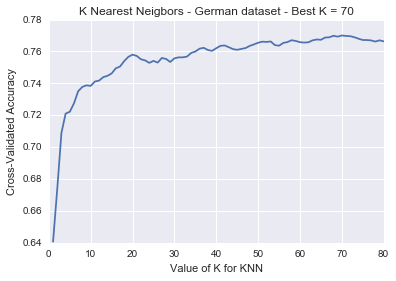

In [41]:
# plot values of K
grid_mean_scores = [result.mean_validation_score for result in knn_grid_g.grid_scores_]
plt.plot(range(1, 81), grid_mean_scores)
plt.title("K Nearest Neigbors - German dataset - Best K = 70")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

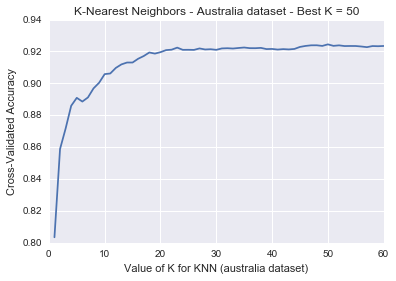

In [42]:
# plot values of K
grid_mean_scores = [result.mean_validation_score for result in knn_grid_a.grid_scores_]
plt.plot(range(1, 61), grid_mean_scores)
plt.title("K-Nearest Neighbors - Australia dataset - Best K = 50")
plt.xlabel('Value of K for KNN (australia dataset)')
plt.ylabel('Cross-Validated Accuracy')

In [43]:
knn = KNeighborsClassifier(n_neighbors=70)
knn2 = KNeighborsClassifier(n_neighbors=50) 

##### III(b). Logistic Regression

In [44]:
lgr_p = {'penalty' : ['l1', 'l2'],                              # search for penalty norm
         'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],             # search for C value
         'random_state':[1]}                                    # for reproducible results

lgr_g = LogisticRegression()                                         # instantiate model
lgr_grid_g = GridSearchCV(lgr_g, lgr_p, cv=5, scoring = 'roc_auc')   # instantiate grid
lgr_grid_g.fit(german, y1)                                           # fit grid with data
print "best parameters: \n", lgr_grid_g.best_params_                 # print best parameters
print "model (german): \n {}".format(lgr_grid_g.best_estimator_)     # print model
 
lgr_a = LogisticRegression()                                         # instantiate model
lgr_grid_a = GridSearchCV(lgr_a, lgr_p, cv=5, scoring = 'roc_auc')   # instantiate grid
lgr_grid_a.fit(australia, y2)                                        # fit grid with data
print " \n best parameters: \n", lgr_grid_a.best_params_             # print best parameters
print "model (australia): \n {}".format(lgr_grid_a.best_estimator_)  # print model

best parameters: 
{'penalty': 'l1', 'C': 10, 'random_state': 1}
model (german): 
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
 
 best parameters: 
{'penalty': 'l1', 'C': 100, 'random_state': 1}
model (australia): 
 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [45]:
lgr = LogisticRegression(C=10, penalty='l1', random_state=1)
lgr2 = LogisticRegression(C=100, penalty='l1', random_state=1)

##### III(c). Naive Bayes

In [46]:
# this model has no parameters
nb = GaussianNB() 
nb2= GaussianNB() 

##### III(d). Decision Tree

In [47]:
dt_p = {'max_features':[3,4,5,6,7],       # number of features to consider for each split
        'min_samples_split':[1,2],        # min. observations req'd to split internal node
        'max_depth':[2,3,4,5,6],          # number of nodes in depth
        'min_samples_leaf':[1,2,3,4,5,6], # min. obs. req'd in terminal node for a split
        'random_state':[1]}               # for reproducible results
        
dt_g = DecisionTreeClassifier()                                   # instantiate model
dt_grid_g = GridSearchCV(dt_g, dt_p, cv=5, scoring = 'roc_auc')   # instantiate grid
dt_grid_g.fit(german, y1)                                         # fit grid with data
print "best parameters: \n", dt_grid_g.best_params_               # print best parameters
print "model (german): \n {}".format(dt_grid_g.best_estimator_)   # print model
 
dt_a = DecisionTreeClassifier()                                   # instantiate model
dt_grid_a = GridSearchCV(dt_a, dt_p, cv=5, scoring = 'roc_auc')   # instantiate grid
dt_grid_a.fit(australia, y2)                                      # fit grid with data
print " \n best parameters: \n", dt_grid_a.best_params_           # print best parameters
print "model (australia): \n {}".format(dt_grid_a.best_estimator_)# print model

best parameters: 
{'max_features': 6, 'min_samples_split': 1, 'random_state': 1, 'max_depth': 5, 'min_samples_leaf': 2}
model (german): 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=6, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')
 
 best parameters: 
{'max_features': 4, 'min_samples_split': 1, 'random_state': 1, 'max_depth': 3, 'min_samples_leaf': 5}
model (australia): 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [48]:
dt = DecisionTreeClassifier(max_features=6, 
                            min_samples_split=1, 
                            max_depth=5, 
                            min_samples_leaf=2,
                            random_state=1)

dt2 = DecisionTreeClassifier(max_features=4, 
                             min_samples_split=1, 
                             max_depth=3, 
                             min_samples_leaf=5,
                             random_state=1)  

##### IV(a) Bagging Classifier (german)

In [49]:
bag_p = {'base_estimator__min_samples_split':[1],   # use decisiontree parameters
         'base_estimator__max_depth':[5],           # use decisiontree parameters
         'base_estimator__min_samples_leaf':[2],    # use decisiontree parameters
         'n_estimators':[100],
         'max_samples':[0.1, 0.2, 0.3],             # samples to draw from dataset (%)       
         'max_features':[0.6, 0.7, 0.8],            # features to draw from dataset (%)
         'random_state':[1]}
         
bag_g = BaggingClassifier(DecisionTreeClassifier())                                   
bag_grid_g = GridSearchCV(bag_g, bag_p, cv=5, scoring = 'roc_auc')    
bag_grid_g.fit(german, y1)                                          
print "best parameters: \n", bag_grid_g.best_params_                
print "model (german): \n {}".format(bag_grid_g.best_estimator_)  

best parameters: 
{'max_samples': 0.2, 'base_estimator__min_samples_split': 1, 'base_estimator__max_depth': 5, 'n_estimators': 100, 'random_state': 1, 'max_features': 0.7, 'base_estimator__min_samples_leaf': 2}
model (german): 
 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.2, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)


Bagging Classifier - german dataset
Number of trees:  90


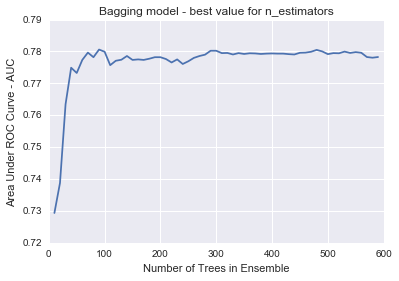

In [50]:
# find best value for n-estimators based on auc
xTrain, xTest, yTrain, yTest = train_test_split(german, y1, test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(10, 600, 10) 
for iTrees in nTreeList:
    bag = BaggingClassifier(DecisionTreeClassifier(max_features=6, 
                                                   min_samples_split=1, 
                                                   max_depth=5, 
                                                   min_samples_leaf=2), 
                            n_estimators=iTrees, 
                            max_samples=0.2, 
                            max_features=0.7,
                            random_state=1)
    bag.fit(xTrain,yTrain)
    prediction = bag.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
    
print "Bagging Classifier - german dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('Bagging model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [51]:
bag = BaggingClassifier(DecisionTreeClassifier(max_features=6, 
                                               min_samples_split=1, 
                                               max_depth=5, 
                                               min_samples_leaf=2), 
                        n_estimators=90,
                        max_samples=0.2, 
                        max_features=0.7, 
                        random_state=1)

##### IV(b). Bagging Classifier (australia)

In [52]:
bag_p = {'base_estimator__min_samples_split':[1],      # use decisiontree parameters
         'base_estimator__max_depth':[3],              # use decisiontree parameters
         'base_estimator__min_samples_leaf':[5],       # use decisiontree parameters
         'n_estimators':[200],
         'max_samples':[0.3, 0.4, 0.5],                # samples to draw from dataset (%)                      
         'max_features':[0.6, 0.7, 0.8],               # features to draw from dataset (%)
         'random_state':[1]}

bag_a = BaggingClassifier(DecisionTreeClassifier())                                    
bag_grid_a = GridSearchCV(bag_a, bag_p, cv=5, scoring = 'roc_auc')    
bag_grid_a.fit(australia, y2)                                          
print "best parameters: \n", bag_grid_a.best_params_                
print "model (australia): \n {}".format(bag_grid_a.best_estimator_)  

best parameters: 
{'max_samples': 0.4, 'base_estimator__min_samples_split': 1, 'base_estimator__max_depth': 3, 'n_estimators': 200, 'random_state': 1, 'max_features': 0.7, 'base_estimator__min_samples_leaf': 5}
model (australia): 
 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.4, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)


Bagging Classifier - australia dataset
Number of trees:  950


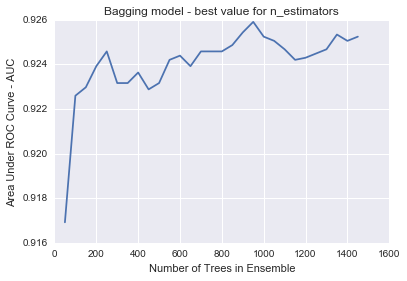

In [53]:
# find best value for n-estimators based on auc
xTrain, xTest, yTrain, yTest = train_test_split(australia, y2, test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(50, 1500, 50) 
for iTrees in nTreeList:
    bag = BaggingClassifier(DecisionTreeClassifier(max_features=4, 
                                                   min_samples_split=1, 
                                                   max_depth=3, 
                                                   min_samples_leaf=5), 
                            n_estimators=iTrees, 
                            max_samples=0.4, 
                            max_features=0.7, 
                            random_state=1)
    bag.fit(xTrain,yTrain)
    prediction = bag.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
    
print "Bagging Classifier - australia dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('Bagging model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [54]:
bag2 = BaggingClassifier(DecisionTreeClassifier(max_features=4, 
                                                min_samples_split=1, 
                                                max_depth=3, 
                                                min_samples_leaf=5), 
                         n_estimators=950, 
                         max_samples=0.4, 
                         max_features=0.7, 
                         random_state=1)

##### IV(c). Extra Trees (german)

In [55]:
et_p = {'n_estimators':[50],                     
        'max_features':[1, 2, 3],
        'max_depth':[8, 9, 10],
        'random_state':[1]}                  
et_g = ExtraTreesClassifier()                                    
et_grid_g = GridSearchCV(et_g, et_p, cv=5, scoring = 'roc_auc')    
et_grid_g.fit(german, y1)                                          
print "best parameters: \n", et_grid_g.best_params_                
print "model (german): \n {}".format(et_grid_g.best_estimator_)  

best parameters: 
{'max_features': 2, 'n_estimators': 50, 'random_state': 1, 'max_depth': 9}
model (german): 
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=9, max_features=2, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


Extra Trees Classifier - german dataset
Number of trees:  60


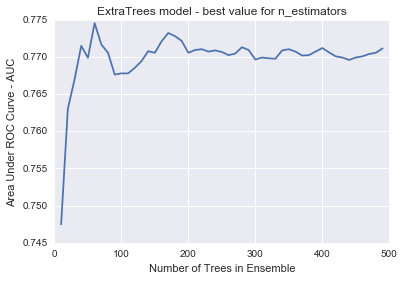

In [56]:
xTrain, xTest, yTrain, yTest = train_test_split(german, y1, test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(10, 500, 10)
for iTrees in nTreeList:
    et = ExtraTreesClassifier(n_estimators=iTrees,  
                              max_features=2,
                              max_depth=9,
                              random_state=1)   
    et.fit(xTrain,yTrain)
    prediction = et.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
       
print "Extra Trees Classifier - german dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('ExtraTrees model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [57]:
et = ExtraTreesClassifier(n_estimators=60,
                          max_features=2,
                          max_depth=9,  
                          random_state=1)

##### IV(d). Extra Trees (australia)

In [58]:
et_p = {'n_estimators':[200],                     
        'max_features':[4, 5, 6],
        'max_depth':[4, 5, 6],
        'random_state':[1]}                  
et_a = ExtraTreesClassifier()                                    
et_grid_a = GridSearchCV(et_a, et_p, cv=5, scoring = 'roc_auc')    
et_grid_a.fit(australia, y2)                                          
print "best parameters: \n", et_grid_a.best_params_                
print "model (australia): \n {}".format(et_grid_a.best_estimator_)  

best parameters: 
{'max_features': 5, 'n_estimators': 200, 'random_state': 1, 'max_depth': 5}
model (australia): 
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features=5, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


Extra Trees Classifier - australia dataset
Number of trees:  300


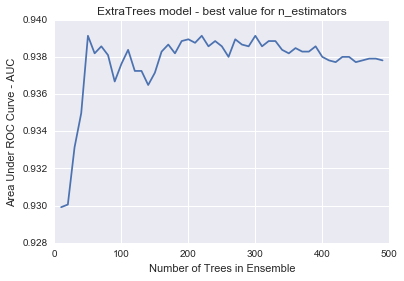

In [59]:
xTrain, xTest, yTrain, yTest = train_test_split(australia, y2, test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(10, 500, 10)
for iTrees in nTreeList:
    et = ExtraTreesClassifier(n_estimators=iTrees, 
                              max_features=5, 
                              max_depth=5, 
                              random_state=1)   
    et.fit(xTrain,yTrain)
    prediction = et.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
       
print "Extra Trees Classifier - australia dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('ExtraTrees model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [60]:
et2 = ExtraTreesClassifier(n_estimators=300, 
                           max_features=5, 
                           max_depth=5, 
                           random_state=1)

##### IV(e). Random Forests (german)

In [61]:
rf_p = {'n_estimators':[400],
        'max_features':[1, 2, 3], 
        'max_depth':[6, 7, 8],
        'random_state': [1]}                  
rf_g = RandomForestClassifier()                                    
rf_grid_g = GridSearchCV(rf_g, rf_p, cv=5, scoring = 'roc_auc')    
rf_grid_g.fit(german, y1)                                          
print "best parameters: \n", rf_grid_g.best_params_                
print "model (german): \n {}".format(rf_grid_g.best_estimator_)  

best parameters: 
{'max_features': 2, 'n_estimators': 400, 'random_state': 1, 'max_depth': 7}
model (german): 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


Random Forests Classifier - german dataset
Number of trees:  1100


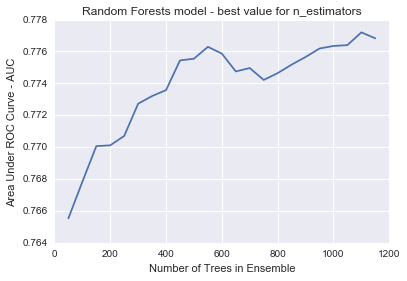

In [62]:
xTrain, xTest, yTrain, yTest = train_test_split(german, y1, test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(50, 1200, 50)       
for iTrees in nTreeList: 
    rf = RandomForestClassifier(n_estimators=iTrees, 
                                max_features=2, 
                                max_depth=7, 
                                random_state=1)
    rf.fit(xTrain,yTrain)
    prediction = rf.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
    
print "Random Forests Classifier - german dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('Random Forests model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [63]:
rf = RandomForestClassifier(n_estimators=1100, 
                            max_features=2, 
                            max_depth=7, 
                            random_state=1)

##### IV(f). Random Forests (australia)

In [64]:
rf_p = {'n_estimators':[1000],
        'max_features':[4, 5, 6], 
        'max_depth':[3, 4, 5],
        'random_state':[1]}                  
rf_a = RandomForestClassifier()                                    
rf_grid_a = GridSearchCV(rf_a, rf_p, cv=5, scoring = 'roc_auc')    
rf_grid_a.fit(australia, y2)                                          
print "best parameters: \n", rf_grid_a.best_params_                
print "model (australia): \n {}".format(rf_grid_a.best_estimator_)  

best parameters: 
{'max_features': 5, 'n_estimators': 1000, 'random_state': 1, 'max_depth': 4}
model (australia): 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


Random Forests Classifier - australia dataset
Number of trees:  300


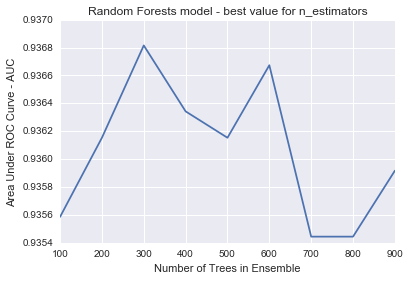

In [65]:
xTrain, xTest, yTrain, yTest = train_test_split(australia, y2, test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(100, 1000, 100)       
for iTrees in nTreeList: 
    rf = RandomForestClassifier(n_estimators=iTrees, 
                                max_features=5, 
                                max_depth=4, 
                                random_state=1)
    rf.fit(xTrain,yTrain)
    prediction = rf.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
    
print "Random Forests Classifier - australia dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('Random Forests model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [66]:
rf2 = RandomForestClassifier(n_estimators=300, 
                             max_features=5, 
                             max_depth=4, 
                             random_state=1)

##### IV(g). Gradient Boosting (german)

In [67]:
gb_p = {'n_estimators':[500],
        'max_features':[2, 3, 4],
        'learning_rate':[0.02, 0.03, 0.04],
        'max_depth':[1, 2, 3],
        'random_state':[1]}                  
gb_g = GradientBoostingClassifier()                                    
gb_grid_g = GridSearchCV(gb_g, gb_p, cv=5, scoring = 'roc_auc')    
gb_grid_g.fit(german, y1)                                          
print "best parameters: \n", gb_grid_g.best_params_                
print "model (german): \n {}".format(gb_grid_g.best_estimator_)

best parameters: 
{'max_features': 3, 'n_estimators': 500, 'learning_rate': 0.03, 'random_state': 1, 'max_depth': 2}
model (german): 
 GradientBoostingClassifier(init=None, learning_rate=0.03, loss='deviance',
              max_depth=2, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)


Gradient Boosting - german dataset
Number of trees:  450


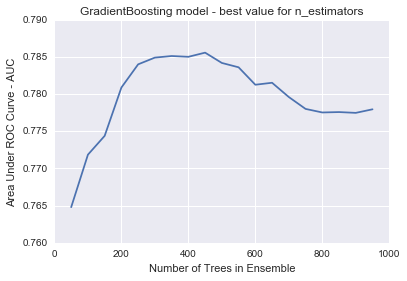

In [68]:
xTrain, xTest, yTrain, yTest = train_test_split(german, y1, 
                                                test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(50, 1000, 50)       
for iTrees in nTreeList:
    gb = GradientBoostingClassifier(n_estimators=iTrees,
                                    max_features=3,
                                    learning_rate=0.03,
                                    max_depth=2,  
                                    random_state=1)
    gb.fit(xTrain, yTrain)
    prediction = gb.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
    
print "Gradient Boosting - german dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('GradientBoosting model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [69]:
gb = GradientBoostingClassifier(n_estimators=450, 
                                max_features=3,
                                learning_rate=0.03,
                                max_depth=2,  
                                random_state=1)

##### IV(h). Gradient Boosting (australia)

In [70]:
gb_p = {'n_estimators':[500],
        'learning_rate':[0.01, 0.02, 0.03],
        'max_features':[1, 2, 3],
        'max_depth':[1, 2, 3],
        'random_state':[1]}                   
gb_a = GradientBoostingClassifier()                                    
gb_grid_a = GridSearchCV(gb_a, gb_p, cv=5, scoring = 'roc_auc')    
gb_grid_a.fit(australia, y2)                                          
print "best parameters: \n", gb_grid_a.best_params_                
print "model (australia): \n {}".format(gb_grid_a.best_estimator_)

best parameters: 
{'max_features': 1, 'n_estimators': 500, 'learning_rate': 0.02, 'random_state': 1, 'max_depth': 2}
model (australia): 
 GradientBoostingClassifier(init=None, learning_rate=0.02, loss='deviance',
              max_depth=2, max_features=1, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)


Gradient Boosting - australia dataset
Number of trees:  1200


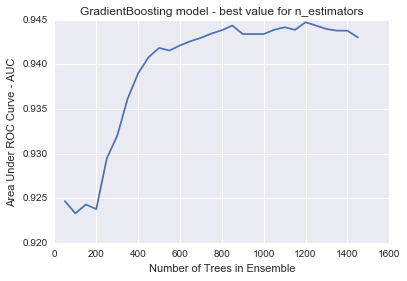

In [71]:
xTrain, xTest, yTrain, yTest = train_test_split(australia, y2, 
                                                test_size=0.30, 
                                                random_state=1)
auc = []
n_trees = {}
nTreeList = range(50, 1500, 50)       
for iTrees in nTreeList:
    gb = GradientBoostingClassifier(n_estimators=iTrees,
                                    learning_rate=0.02,
                                    max_features=1,
                                    max_depth=2, 
                                    random_state=1)
    gb.fit(xTrain, yTrain)
    prediction = gb.predict_proba(xTest)
    aucCalc = roc_auc_score(yTest, prediction[:,1:2])
    auc.append(aucCalc)
    n_trees.update({iTrees : aucCalc})
    
print "Gradient Boosting - australia dataset"
print "Number of trees: ", [key for key,val in n_trees.iteritems() 
                            if val == max(n_trees.values())][0]

#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, auc)
plt.title('GradientBoosting model - best value for n_estimators')
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
plt.show()

In [72]:
gb2 = GradientBoostingClassifier(n_estimators=1200,
                                 learning_rate=0.02,
                                 max_features=1,
                                 max_depth=2, 
                                 random_state=1)

### V. Model Scoring using Accuracy, F1 & ROC_AUC

In [73]:
accuracy_german = []
f1_german = []
auc_german = []

model_names = ['K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 
               'Bagging Classifier', 'Extra Trees Classifier', 'Random Forests', 
               'Gradient Boosting']

#begin with KNN which will use scaled data
acc = cross_val_score(knn, Scaled_g, y1, cv=5, scoring='accuracy')
f1 = cross_val_score(knn, Scaled_g, y1, cv=5, scoring='f1')
auc = cross_val_score(knn, Scaled_g, y1, cv=5, scoring='roc_auc')
accuracy_german.append(np.mean(acc))
f1_german.append(np.mean(f1))
auc_german.append(np.mean(auc))

#proceed with remaining models
models = [lgr, nb, dt, bag, et, rf, gb]
for model in models:
    acc = cross_val_score(model, german, y1, cv=5, scoring='accuracy')
    f1 = cross_val_score(model, german, y1, cv=5, scoring='f1')
    auc = cross_val_score(model, german, y1, cv=5, scoring='roc_auc')
    accuracy_german.append(np.mean(acc))
    f1_german.append(np.mean(f1))
    auc_german.append(np.mean(auc))
    
scores = pd.DataFrame(zip(accuracy_german, f1_german, auc_german), 
                      index=model_names, 
                      columns=['Accuracy', 'F1-measure', 'Roc/Auc'])
print '\nModel Scoring - German'
scores


Model Scoring - German


,Accuracy,F1-measure,Roc/Auc
K-Nearest Neighbors,0.734,0.836329,0.770024
Logistic Regression,0.757,0.837242,0.779333
Naive Bayes,0.749,0.827641,0.775286
Decision Tree,0.738,0.817323,0.730929
Bagging Classifier,0.734,0.835223,0.781310
Extra Trees Classifier,0.741,0.833024,0.779000
Random Forests,0.751,0.839283,0.773714
Gradient Boosting,0.759,0.836524,0.787929


In [74]:
accuracy_australia = []
f1_australia = []
auc_australia = []

#begin with KNN which will use scaled data
acc = cross_val_score(knn2, Scaled_a, y2, cv=5, scoring='accuracy')
f1 = cross_val_score(knn2, Scaled_a, y2, cv=5, scoring='f1')
auc = cross_val_score(knn2, Scaled_a, y2, cv=5, scoring='roc_auc')
accuracy_australia.append(np.mean(acc))
f1_australia.append(np.mean(f1))
auc_australia.append(np.mean(auc))

#proceed with remaining models
models = [lgr2, nb2, dt2, bag2, et2, rf2, gb2]
for model in models:
    acc = cross_val_score(model, australia, y2, cv=5, scoring='accuracy')
    f1 = cross_val_score(model, australia, y2, cv=5, scoring='f1')
    auc = cross_val_score(model, australia, y2, cv=5, scoring='roc_auc')
    accuracy_australia.append(np.mean(acc))
    f1_australia.append(np.mean(f1))
    auc_australia.append(np.mean(auc))

scores = pd.DataFrame(zip(accuracy_australia, f1_australia, auc_australia), 
                      index=model_names, 
                      columns=['Accuracy', 'F1-measure', 'Roc/Auc'])
print '\nModel Scoring - Australian'
scores


Model Scoring - Australian


,Accuracy,F1-measure,Roc/Auc
K-Nearest Neighbors,0.854971,0.830437,0.924446
Logistic Regression,0.857965,0.847256,0.927259
Naive Bayes,0.785456,0.721319,0.901535
Decision Tree,0.836120,0.821083,0.923308
Bagging Classifier,0.857849,0.837247,0.933996
Extra Trees Classifier,0.852146,0.839809,0.928748
Random Forests,0.850592,0.834565,0.936143
Gradient Boosting,0.853585,0.833193,0.932403


### VI. Probability Predictions

##### VI(a). Wrappers in conjunction with Cross_Val_Predict

In [75]:
class proba_knn(KNeighborsClassifier):
    def predict(self, X):
        return KNeighborsClassifier.predict_proba(self, X)

class proba_lgr(LogisticRegression):
    def predict(self, X):
        return LogisticRegression.predict_proba(self, X)

class proba_nb(GaussianNB):
    def predict(self, X):
        return GaussianNB.predict_proba(self, X)

class proba_dt(DecisionTreeClassifier):
    def predict(self, X):
        return DecisionTreeClassifier.predict_proba(self, X)

class proba_bag(BaggingClassifier):
    def predict(self, X):
        return BaggingClassifier.predict_proba(self, X)

class proba_et(ExtraTreesClassifier):
    def predict(self, X):
        return ExtraTreesClassifier.predict_proba(self, X)

class proba_rf(RandomForestClassifier):
    def predict(self, X):
        return RandomForestClassifier.predict_proba(self, X)

class proba_gb(GradientBoostingClassifier):
    def predict(self, X):
        return GradientBoostingClassifier.predict_proba(self, X)

##### VI(b). Probability Predicitions

In [76]:
knn_probs, lgr_probs, nb_probs, dt_probs, bag_probs, et_probs, rf_probs, gb_probs = [],\
[], [], [], [], [], [], [] 

knn_probs2, lgr_probs2, nb_probs2, dt_probs2, bag_probs2, et_probs2, rf_probs2, gb_probs2 \
= [], [], [], [], [], [], [], [] 


#  K-Nearest Neighbors 
probs = cross_val_predict(proba_knn(n_neighbors=70), 
                          Scaled_g, y1, cv=5)
for i in range(len(probs)): knn_probs.append(probs[i][1])   
    
probs = cross_val_predict(proba_knn(n_neighbors=50), 
                          Scaled_a, y2, cv=5)
for i in range(len(probs)): knn_probs2.append(probs[i][1])   
    

#  Logistic Regression
probs = cross_val_predict(proba_lgr(C=10,   
                                    penalty='l1', 
                                    random_state=1), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    lgr_probs.append(probs[i][1])  
    
probs = cross_val_predict(proba_lgr(C=100, 
                                    penalty='l1', 
                                    random_state=1), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    lgr_probs2.append(probs[i][1])     
    

#  Naive Bayes 
probs = cross_val_predict(proba_nb(), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    nb_probs.append(probs[i][1])  
    
probs = cross_val_predict(proba_nb(), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    nb_probs2.append(probs[i][1])    

    
# Decision Trees   
probs = cross_val_predict(proba_dt(max_features=6, 
                                   min_samples_split=1, 
                                   max_depth=5, 
                                   min_samples_leaf=2), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    dt_probs.append(probs[i][1]) 
    
probs = cross_val_predict(proba_dt(max_features=4, 
                                   min_samples_split=1, 
                                   max_depth=3, 
                                   min_samples_leaf=5), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    dt_probs2.append(probs[i][1])    

    
#  Bagging Classifier (using Decision Tree with parameters as base estimator)
probs = cross_val_predict(proba_bag(DecisionTreeClassifier(max_features=6, 
                                                           min_samples_split=1, 
                                                           max_depth=5, 
                                                           min_samples_leaf=2), 
                                    n_estimators=90, 
                                    max_samples=0.2, 
                                    max_features=0.7, 
                                    random_state=1), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    bag_probs.append(probs[i][1]) 
    
probs = cross_val_predict(proba_bag(DecisionTreeClassifier(max_features=4, 
                                                           min_samples_split=1, 
                                                           max_depth=3, 
                                                           min_samples_leaf=5), 
                                    n_estimators=950, 
                                    max_samples=0.4, 
                                    max_features=0.7, 
                                    random_state=1), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    bag_probs2.append(probs[i][1])     

    
# Extra Trees  
probs = cross_val_predict(proba_et(n_estimators=60, 
                                   max_features=2, 
                                   max_depth=9, 
                                   random_state=1), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    et_probs.append(probs[i][1])   
    
probs = cross_val_predict(proba_et(n_estimators=300, 
                                   max_features=5, 
                                   max_depth=5, 
                                   random_state=1), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    et_probs2.append(probs[i][1])    
    
    
# Random Forests   
probs = cross_val_predict(proba_rf(n_estimators=1100, 
                                   max_features=2, 
                                   max_depth=7, 
                                   random_state=1), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    rf_probs.append(probs[i][1]) 
    
probs = cross_val_predict(proba_rf(n_estimators=300,  
                                   max_features=5, 
                                   max_depth=4, 
                                   random_state=1), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    rf_probs2.append(probs[i][1])     
    
    
# Gradient Boosting
probs = cross_val_predict(proba_gb(n_estimators=450, 
                                   max_features=3, 
                                   learning_rate=0.03, 
                                   max_depth=2, 
                                   random_state=1), 
                          german, y1, cv=5)
for i in range(len(probs)): 
    gb_probs.append(probs[i][1])   
    
probs = cross_val_predict(proba_gb(n_estimators=1200,
                                   learning_rate=0.02,
                                   max_features=1,
                                   max_depth=2, 
                                   random_state=1), 
                          australia, y2, cv=5)
for i in range(len(probs)): 
    gb_probs2.append(probs[i][1])    

### VII. Cost-Profit Considerations

##### VII(a). Confusion Matrix

In [77]:
def confusion_matrx(threshold, prob_preds, targets):
    true_positives, false_positives, false_negatives, true_negatives = 0, 0, 0, 0
    for i in range(len(targets)):
        prob_pred, target = prob_preds[i], targets[i]
        if prob_pred >= threshold and target == 1: # pos class is labeled 1
            true_positives += 1
        elif prob_pred < threshold and target == 1:
            false_negatives += 1
        elif prob_pred >= threshold and target == 0: # neg class is labeled 0
            false_positives += 1
        elif prob_pred < threshold and target == 0:
            true_negatives += 1
        else:
            print 'check confusion_matrx'
    return true_positives, false_positives, false_negatives, true_negatives

predicted_positive_b = [' TP  -  good customers predicted as good',  
                        ' FP  -  bad customers predicted as good']
predicted_negative_b = [' FN  -  good customers predicted as bad', 
                        ' TN  -  bad customers predicted as bad']
classes_b = ['Creditworthy (actual)', 'NonCreditworthy (actual)']      
con_mat = pd.DataFrame(zip(predicted_positive_b, predicted_negative_b), index=classes_b, 
                           columns=['Predicted_Creditworthy', 'Predicted_NonCreditworthy'])
print '\n\nShow the row and column labels in the confusion matrix and include a description'
print 'for True Positives, False Negatives, False Positives, and True Negatives.'
con_mat



Show the row and column labels in the confusion matrix and include a description
for True Positives, False Negatives, False Positives, and True Negatives.


,Predicted_Creditworthy,Predicted_NonCreditworthy
Creditworthy (actual),TP - good customers predicted as good,FN - good customers predicted as bad
NonCreditworthy (actual),FP - bad customers predicted as good,TN - bad customers predicted as bad


##### VII(b). Cost of False Positives

In [78]:
predicted_positive_c = ['gain of 1 dollar', 'loss of 2 dollars']    
predicted_negative_c = ['no loss (however, a gain is prevented)', 
                        'no gain (however, a loss prevented)']
cost_matrix = pd.DataFrame(zip(predicted_positive_c, predicted_negative_c), index=classes_b, 
                           columns=['Predicted_Creditworthy', 'Predicted_NonCreditworthy'])
print "\nDetermine the cost of a false positive in terms of true positives, for example, the" 
print "amount of money the bank losses when a 'bad customer is predicted as good' cost twice" 
print "('2-to-1 Cost-Profit Ratio') of what the bank gains when a 'good customer is "
print "predicted good'.  In section X, we will take a look at other cost-profit ratios."
cost_matrix


Determine the cost of a false positive in terms of true positives, for example, the
amount of money the bank losses when a 'bad customer is predicted as good' cost twice
('2-to-1 Cost-Profit Ratio') of what the bank gains when a 'good customer is 
predicted good'.  In section X, we will take a look at other cost-profit ratios.


,Predicted_Creditworthy,Predicted_NonCreditworthy
Creditworthy (actual),gain of 1 dollar,"no loss (however, a gain is prevented)"
NonCreditworthy (actual),loss of 2 dollars,"no gain (however, a loss prevented)"


##### VII(c). Threshold Function

In [79]:
def threshold_results(thresh, prob_preds, targets, ratio, option=0):
# calculates one profit for a single model, at a single threshold 
    tp, fp, fn, tn = confusion_matrx(thresh, prob_preds, targets) 
    cost = fp * ratio
    gain = tp * 1
    profit = gain - cost
    if option == 0:  # do not print, return profit
        return profit
    elif option == 1:  # print con mat, tpr, fpr, profit; return tp, fp, tpr, fpr
        tpr = round(tp / (tp + fn), 2)
        fpr = round(fp / (fp + tn), 2)
        print "tp", tp, "  fn", fn, '   row total:', tp + fn
        print "fp", fp, "   tn", tn, '   row total:', fp + tn
        print "true positive rate", tpr, " false positive rate", fpr
        print "unit profit", profit
        return tp, fp, tpr, fpr
    elif option == 2:  # print con mat, include accuracy & F1 results
        print "tp", tp, "  fn", fn, '   row total:', tp + fn
        print "fp", fp, "  tn", tn, '  row total:', fp + tn        
        accuracy = (tp + tn) / (tp + fp + fn + tn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)    # also, the true positive rate (tpr)
        f1_score = 2 * (precision * recall) / (precision + recall) 
        print "accuracy:", round(accuracy, 6), "  f1_score", round(f1_score, 6)
        acc_at_50.append(accuracy)   # acc_at_50 is global 
        f1_at_50.append(f1_score)    # f1_at_50 is global
        print "unit profit", profit
    else: 
        print 'check threshold options'

### VIII. Profits & Metrics using a Cost-Profit Ratio of 2-to-1 

##### VIII(a). Metrics & Unit Profits at 50% Thresholds

In [80]:
probs = [knn_probs, lgr_probs, nb_probs, dt_probs, bag_probs, et_probs, rf_probs, gb_probs]
acc_at_50 = []
f1_at_50 = []
ratio = 2

print '\nConfusion matrices, accuracy & f1 calculations, and profit results at 50% threshold'
print 'for each model.'

for i in range(len(model_names)):
    prob_preds = probs[i]
    print '\n', model_names[i] + ' at 50', '(german)'
    option = 2  # option 2 prints certain metrics, & stores acc/f-1 scores
    threshold_results(0.5, prob_preds, y1, ratio, option)  
    
print '\n \n', "Accuracy calculation is generally in line with the accuracy results from \
section 5.\nModels based on German dataset"
    
df_50_acc = pd.DataFrame(zip(acc_at_50, accuracy_german), index=model_names, 
                         columns=['accuracy_at_50', 'accuracy_from_section_5'])
df_50_acc


Confusion matrices, accuracy & f1 calculations, and profit results at 50% threshold
for each model.

K-Nearest Neighbors at 50 (german)
tp 682   fn 18    row total: 700
fp 255   tn 45   row total: 300
accuracy: 0.727   f1_score 0.833232
unit profit 172

Logistic Regression at 50 (german)
tp 626   fn 74    row total: 700
fp 169   tn 131   row total: 300
accuracy: 0.757   f1_score 0.837458
unit profit 288

Naive Bayes at 50 (german)
tp 606   fn 94    row total: 700
fp 157   tn 143   row total: 300
accuracy: 0.749   f1_score 0.828435
unit profit 292

Decision Tree at 50 (german)
tp 609   fn 91    row total: 700
fp 194   tn 106   row total: 300
accuracy: 0.715   f1_score 0.810379
unit profit 221

Bagging Classifier at 50 (german)
tp 660   fn 40    row total: 700
fp 216   tn 84   row total: 300
accuracy: 0.744   f1_score 0.837563
unit profit 228

Extra Trees Classifier at 50 (german)
tp 642   fn 58    row total: 700
fp 182   tn 118   row total: 300
accuracy: 0.76   f1_score 0.84252
unit pr

,accuracy_at_50,accuracy_from_section_5
K-Nearest Neighbors,0.727,0.734
Logistic Regression,0.757,0.757
Naive Bayes,0.749,0.749
Decision Tree,0.715,0.738
Bagging Classifier,0.744,0.734
Extra Trees Classifier,0.760,0.741
Random Forests,0.747,0.751
Gradient Boosting,0.765,0.759


In [81]:
print "\nF1 calculation is generally in line with the f1 results from section 5."
print "Models based on German dataset"
df_50_f1 = pd.DataFrame(zip(f1_at_50, f1_german), index=model_names, 
                        columns=['F1_at_50', 'F1_from_section_5'])
df_50_f1['difference'] = df_50_f1.F1_from_section_5 - df_50_f1.F1_at_50 
df_50_f1


F1 calculation is generally in line with the f1 results from section 5.
Models based on German dataset


,F1_at_50,F1_from_section_5,difference
K-Nearest Neighbors,0.833232,0.836329,0.003098
Logistic Regression,0.837458,0.837242,-0.000217
Naive Bayes,0.828435,0.827641,-0.000793
Decision Tree,0.810379,0.817323,0.006944
Bagging Classifier,0.837563,0.835223,-0.002340
Extra Trees Classifier,0.842520,0.833024,-0.009496
Random Forests,0.837090,0.839283,0.002193
Gradient Boosting,0.840027,0.836524,-0.003503


VIII(a). Metrics & Unit Profits at 50% Thresholds (cont'd)

In [82]:
probs2 = [knn_probs2, lgr_probs2, nb_probs2, dt_probs2, bag_probs2, et_probs2, rf_probs2,\
          gb_probs2]
acc_at_50 = []
f1_at_50 = []
ratio = 2

print '\nConfusion matrices, accuracy & f1 calculations, and profit results at 50% threshold'
print 'for each model.'

for i in range(len(model_names)):
    prob_preds = probs2[i]
    print '\n', model_names[i] + ' at 50', '(australia)'
    option = 2  # option 2 prints certain metrics, & stores acc/f-1 scores
    threshold_results(0.5, prob_preds, y2, ratio, option)
    
print '\n \n', "Accuracy calculation is generally in line with the accuracy results from \
section 5.\nModels based on Australian dataset"
    
df_50_acc = pd.DataFrame(zip(acc_at_50, accuracy_australia), index=model_names, 
                         columns=['accuracy_at_50', 'accuracy_from_section_5'])
df_50_acc['difference'] = df_50_acc.accuracy_from_section_5 - df_50_acc.accuracy_at_50 
df_50_acc


Confusion matrices, accuracy & f1 calculations, and profit results at 50% threshold
for each model.

K-Nearest Neighbors at 50 (australia)
tp 248   fn 59    row total: 307
fp 43   tn 340   row total: 383
accuracy: 0.852174   f1_score 0.829431
unit profit 162

Logistic Regression at 50 (australia)
tp 269   fn 38    row total: 307
fp 60   tn 323   row total: 383
accuracy: 0.857971   f1_score 0.845912
unit profit 149

Naive Bayes at 50 (australia)
tp 192   fn 115    row total: 307
fp 33   tn 350   row total: 383
accuracy: 0.785507   f1_score 0.721805
unit profit 126

Decision Tree at 50 (australia)
tp 254   fn 53    row total: 307
fp 66   tn 317   row total: 383
accuracy: 0.827536   f1_score 0.810207
unit profit 122

Bagging Classifier at 50 (australia)
tp 253   fn 54    row total: 307
fp 44   tn 339   row total: 383
accuracy: 0.857971   f1_score 0.837748
unit profit 165

Extra Trees Classifier at 50 (australia)
tp 266   fn 41    row total: 307
fp 61   tn 322   row total: 383
accuracy: 0

,accuracy_at_50,accuracy_from_section_5,difference
K-Nearest Neighbors,0.852174,0.854971,0.002798
Logistic Regression,0.857971,0.857965,-0.000006
Naive Bayes,0.785507,0.785456,-0.000051
Decision Tree,0.827536,0.836120,0.008583
Bagging Classifier,0.857971,0.857849,-0.000122
Extra Trees Classifier,0.852174,0.852146,-0.000028
Random Forests,0.850725,0.850592,-0.000133
Gradient Boosting,0.853623,0.853585,-0.000038


In [83]:
print "\nF1 calc. is generally in line with the f1 results from section 5"
print "Models based on Australian dataset"
df_50_f1 = pd.DataFrame(zip(f1_at_50, f1_australia), index=model_names, 
                        columns=['F1_at_50', 'F1_from_section_5'])
df_50_f1['difference'] = df_50_f1.F1_from_section_5 - df_50_f1.F1_at_50
df_50_f1


F1 calc. is generally in line with the f1 results from section 5
Models based on Australian dataset


,F1_at_50,F1_from_section_5,difference
K-Nearest Neighbors,0.829431,0.830437,0.001005
Logistic Regression,0.845912,0.847256,0.001344
Naive Bayes,0.721805,0.721319,-0.000486
Decision Tree,0.810207,0.821083,0.010876
Bagging Classifier,0.837748,0.837247,-0.000502
Extra Trees Classifier,0.839117,0.839809,0.000692
Random Forests,0.834138,0.834565,0.000427
Gradient Boosting,0.834154,0.833193,-0.000961


##### VIII(b). Unit Profits Across Thresholds

In [84]:
profits = []
thresholds = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75]
ratio = 2

for i in probs:
    for threshold in thresholds:
        profit = threshold_results(threshold, i, y1, ratio)
        profits.append(profit)

thresh50profits, thresh55profits, thresh60profits, thresh65profits, thresh70profits, \
thresh75profits = [], [], [], [], [], []
counter = 0
for j in range(len(probs)):
    if counter != 0: counter += 1
    thresh50profits.append(profits[counter])
    counter += 1
    thresh55profits.append(profits[counter])
    counter += 1    
    thresh60profits.append(profits[counter])
    counter += 1        
    thresh65profits.append(profits[counter])
    counter += 1        
    thresh70profits.append(profits[counter])
    counter += 1        
    thresh75profits.append(profits[counter])

thrsh = pd.DataFrame(zip(thresh50profits, thresh55profits, thresh60profits, 
                         thresh65profits, thresh70profits, thresh75profits), 
                     index=model_names, 
                     columns=['Thresh_50', 'Thresh_55', 'Thresh_60','Thresh_65',
                              'Thresh_70', 'Thresh_75'])

print '\n\nUnit Profits across Thresholds - German'
thrsh



Unit Profits across Thresholds - German


,Thresh_50,Thresh_55,Thresh_60,Thresh_65,Thresh_70,Thresh_75
K-Nearest Neighbors,172,221,250,321,339,312
Logistic Regression,288,312,344,345,339,313
Naive Bayes,292,303,324,341,329,325
Decision Tree,221,244,256,259,264,260
Bagging Classifier,228,306,345,369,344,301
Extra Trees Classifier,278,291,334,324,312,295
Random Forests,244,305,337,352,334,285
Gradient Boosting,313,339,351,355,351,333


VIII(b). Unit Profits Across Thresholds (cont'd)

In [85]:
profits = []
thresholds = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75]
ratio = 2

for i in probs2:
    for threshold in thresholds:
        profit = threshold_results(threshold, i, y2, ratio)
        profits.append(profit)

thresh50profits, thresh55profits, thresh60profits, thresh65profits, thresh70profits, \
thresh75profits = [], [], [], [], [], []

counter = 0
for j in range(len(probs)):
    if counter != 0: counter += 1
    thresh50profits.append(profits[counter])
    counter += 1
    thresh55profits.append(profits[counter])
    counter += 1    
    thresh60profits.append(profits[counter])
    counter += 1        
    thresh65profits.append(profits[counter])
    counter += 1        
    thresh70profits.append(profits[counter])
    counter += 1        
    thresh75profits.append(profits[counter])

thrsh = pd.DataFrame(zip(thresh50profits, thresh55profits, thresh60profits, 
                         thresh65profits, thresh70profits, thresh75profits), 
                     index=model_names, 
                     columns=['Thresh_50', 'Thresh_55', 'Thresh_60','Thresh_65',
                              'Thresh_70', 'Thresh_75'])

print '\n\nUnit Profits across Thresholds - Australian'
thrsh



Unit Profits across Thresholds - Australian


,Thresh_50,Thresh_55,Thresh_60,Thresh_65,Thresh_70,Thresh_75
K-Nearest Neighbors,162,172,172,169,166,160
Logistic Regression,149,154,169,164,164,159
Naive Bayes,126,127,125,122,117,115
Decision Tree,122,170,170,176,176,176
Bagging Classifier,165,171,178,182,163,154
Extra Trees Classifier,144,156,160,168,173,168
Random Forests,149,150,164,173,178,176
Gradient Boosting,158,164,171,171,166,166


##### VIII(c). Best Performing Model by Highest Unit Profit 

In [86]:
# create lists for storing details;  sequence:lowest cost ratios to highest 
thrs, thrs2 = [], []   # thresholds for best performing models
tprs, tprs2 = [], []   # true positive rates for best performing models
fprs, fprs2 = [], []   # false positive rates for best performing models
mdls, mdls2 = [], []   # best performing model names at thresholds
prfs, prfs2 = [], []   # highest profits for best performing models

In [87]:
modls = []
profits = []
ratio = 2

for i in range(len(model_names)):
    j = 0.60   #  set threshold start range
    prob_preds = probs[i]

    # check thresholds for all models at 1% increments
    while j <= 0.80:   # set threshold end range
        modl = str(model_names[i]) + ' at ' + str(round(j,2)) + ' '
        modls.append(modl)
        profit = threshold_results(j, prob_preds, y1, ratio) 
        profits.append(profit) 
        j += 0.01

s_indx = [profits.index(x) for x in sorted(profits, reverse=True)]
    
print '\nDetails for best scoring model by unit profit at ratio 2 (German)\n'
print modls[s_indx[0]], 'unit profit', profits[s_indx[0]], '\nconfusion matrix'

#view results, then manually enter threshold and probability-predictions values
thr = 0.65
prob_preds = bag_probs
option = 1  # option 1 prints certain metrics
tp, fp, tpr, fpr = threshold_results(thr, prob_preds, y1, ratio, option)  

thrs.append(thr)
tprs.append(tpr)
fprs.append(fpr)
mdls.append(modls[s_indx[0]])
prfs.append(profits[s_indx[0]])  


Details for best scoring model by unit profit at ratio 2 (German)

Bagging Classifier at 0.65  unit profit 369 
confusion matrix
tp 547   fn 153    row total: 700
fp 89    tn 211    row total: 300
true positive rate 0.78  false positive rate 0.3
unit profit 369


In [88]:
modls = []
profits = []
ratio = 2

for i in range(len(model_names)):
    j = 0.60   #  set threshold start range
    prob_preds = probs2[i]

    # check thresholds for all models at 1% increments
    while j <= 0.80:   # set threshold end range
        modl = str(model_names[i]) + ' at ' + str(round(j,2)) + ' '
        modls.append(modl)
        profit = threshold_results(j, prob_preds, y2, ratio) 
        profits.append(profit) 
        j += 0.01

s_indx = [profits.index(x) for x in sorted(profits, reverse=True)]
    
print '\nDetails for best scoring model by unit profit at ratio 2 (Australian)\n'
print modls[s_indx[0]], 'unit profit', profits[s_indx[0]], '\nconfusion matrix'

#view results, then manually enter threshold and probability-predictions values
thr = 0.64
prob_preds = bag_probs2
option = 1   # option 1 prints certain metrics
tp, fp, tpr, fpr = threshold_results(thr, prob_preds, y2, ratio, option) 

thrs2.append(thr)
tprs2.append(tpr)
fprs2.append(fpr)
mdls2.append(modls[s_indx[0]])
prfs2.append(profits[s_indx[0]])  


Details for best scoring model by unit profit at ratio 2 (Australian)

Bagging Classifier at 0.64  unit profit 185 
confusion matrix
tp 221   fn 86    row total: 307
fp 18    tn 365    row total: 383
true positive rate 0.72  false positive rate 0.05
unit profit 185


### IX. Feature Importance & Model Descriptions

##### IV(a). Feature Importance


Feature Importance - German


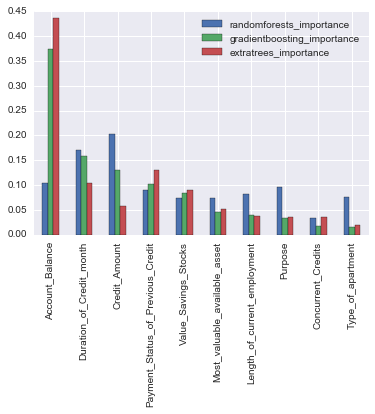

In [89]:
gb.fit(german, y1)
rf.fit(german, y1)
et.fit(german, y1)
importances = pd.DataFrame(zip(gb.feature_importances_, 
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=german.columns, 
                           columns=['randomforests_importance',
                                    'gradientboosting_importance', 
                                    'extratrees_importance']).\
sort_values('gradientboosting_importance', ascending=False)
importances.plot(kind='bar')
print '\nFeature Importance - German'

In [90]:
print 'importances - German'
importances

importances - German


,randomforests_importance,gradientboosting_importance,extratrees_importance
Account_Balance,0.104928,0.374814,0.437169
Duration_of_Credit_month,0.169468,0.158066,0.104438
Credit_Amount,0.201821,0.129602,0.057440
Payment_Status_of_Previous_Credit,0.088862,0.102838,0.129837
Value_Savings_Stocks,0.074302,0.083399,0.090417
Most_valuable_available_asset,0.073246,0.044515,0.051763
Length_of_current_employment,0.082655,0.040305,0.037830
Purpose,0.095245,0.033197,0.036336
Concurrent_Credits,0.034339,0.017824,0.035869
Type_of_apartment,0.075135,0.015441,0.018901


IX(a). Feature Importance (cont'd)


Feature Importance - Australian


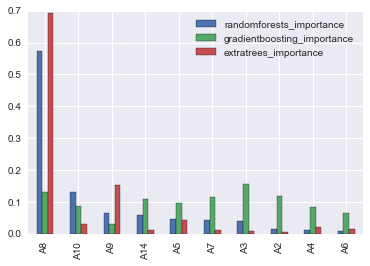

In [91]:
gb2.fit(australia, y2)
rf2.fit(australia, y2)
et2.fit(australia, y2)
importances = pd.DataFrame(zip(rf2.feature_importances_, 
                               gb2.feature_importances_,
                               et2.feature_importances_),
                           index=australia.columns, 
                           columns=['randomforests_importance', 
                                    'gradientboosting_importance', 
                                    'extratrees_importance']).\
sort_values('randomforests_importance', ascending=False)
importances.plot(kind='bar')
print '\nFeature Importance - Australian'

In [92]:
print 'importances - Australian'
importances

importances - Australian


,randomforests_importance,gradientboosting_importance,extratrees_importance
A8,0.572183,0.131483,0.693086
A10,0.132699,0.086855,0.031008
A9,0.065700,0.031066,0.152790
A14,0.060511,0.108492,0.013734
A5,0.046787,0.097608,0.044901
A7,0.042970,0.116398,0.012562
A3,0.041764,0.157180,0.009184
A2,0.016880,0.120174,0.007497
A4,0.011665,0.084563,0.020535
A6,0.008843,0.066181,0.014703


##### IX(c). Description of Learning Algorithms

KNeighborsClassifier is a non-parametric method where input consists of the k closest training examples in the feature space. 

LogisticRegression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a sigmoid curve. 

NaiveBayes (GaussianNB) is a probabilistic classifier based on the assumption of independence between the features.

DecisionTree Classifier is a non-parametric supervised learning method that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Bagging Classifier is a method that involves building multiple models from different subsamples of the training dataset, and the final prediction is averaged across the predictions of all of the sub-models.

RandomForests Classifier is an extension of bagged decision trees, but rather than choosing the best split point in the construction of the tree, only a random subset of features are considered for each split.

ExtraTrees Classifier is simliar to RandomForests, except splits are chosen at random.

GradientBoosting Classifier creates a sequence of models that attempt to correct the errors of the prior models based on the negative gradient.  Once created, the models make predictions weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

### X. Best Performing Models using other Cost-Profit Ratios

##### X(a). Cost-Profit Ratios of 3-to-1, and 4-to-1 (German) 

In [93]:
modls = []
profits = []
ratio = 3

for i in range(len(model_names)):
    j = 0.60   #  set threshold start range
    prob_preds = probs[i]

    # check thresholds for all models at 1% increments
    while j <= 0.90:   # set threshold end range
        modl = str(model_names[i]) + ' at ' + str(round(j,2)) + ' '
        modls.append(modl)
        profit = threshold_results(j, prob_preds, y1, ratio) 
        profits.append(profit) 
        j += 0.01

s_indx = [profits.index(x) for x in sorted(profits, reverse=True)]
    
print '\nDetails for best scoring model by unit profit at ratio 3 (German)\n'
print modls[s_indx[0]], 'unit profit', profits[s_indx[0]], '\nconfusion matrix'

#view results, then manually enter threshold and probability-predictions values
thr = 0.68
prob_preds = bag_probs
tp, fp, tpr, fpr = threshold_results(thr, prob_preds, y1, ratio, 1)  

thrs.append(thr)
tprs.append(tpr)
fprs.append(fpr)
mdls.append(modls[s_indx[0]])
prfs.append(profits[s_indx[0]])  


Details for best scoring model by unit profit at ratio 3 (German)

Bagging Classifier at 0.68  unit profit 289 
confusion matrix
tp 505   fn 195    row total: 700
fp 72    tn 228    row total: 300
true positive rate 0.72  false positive rate 0.24
unit profit 289


In [94]:
modls = []
profits = []
ratio = 4

for i in range(len(model_names)):
    j = 0.60   #  set threshold start range
    prob_preds = probs[i]

    # check thresholds for all models at 1% increments
    while j <= 0.90:   # set threshold end range
        modl = str(model_names[i]) + ' at ' + str(round(j,2)) + ' '
        modls.append(modl)
        profit = threshold_results(j, prob_preds, y1, ratio) 
        profits.append(profit) 
        j += 0.01

s_indx = [profits.index(x) for x in sorted(profits, reverse=True)]
    
print '\nDetails for best scoring model by unit profit at ratio 4 (German)\n'
print modls[s_indx[0]], 'unit profit', profits[s_indx[0]], '\nconfusion matrix'

#view results, then manually enter threshold and probability-predictions values
thr = 0.69
prob_preds = bag_probs
tp, fp, tpr, fpr = threshold_results(thr, prob_preds, y1, ratio, 1)  

thrs.append(thr)
tprs.append(tpr)
fprs.append(fpr)
mdls.append(modls[s_indx[0]])
prfs.append(profits[s_indx[0]])  


Details for best scoring model by unit profit at ratio 4 (German)

Bagging Classifier at 0.69  unit profit 220 
confusion matrix
tp 492   fn 208    row total: 700
fp 68    tn 232    row total: 300
true positive rate 0.7  false positive rate 0.23
unit profit 220


##### X(b). Cost-Profit Ratios of 5-to-1, and 6-to-1 (Australian) 

In [95]:
modls = []
profits = []
ratio = 5

for i in range(len(model_names)):
    j = 0.60   #  set threshold start range
    prob_preds = probs2[i]

    # check thresholds for all models at 1% increments
    while j <= 0.80:   # set threshold end range
        modl = str(model_names[i]) + ' at ' + str(round(j,2)) + ' '
        modls.append(modl)
        profit = threshold_results(j, prob_preds, y2, ratio) 
        profits.append(profit) 
        j += 0.01

s_indx = [profits.index(x) for x in sorted(profits, reverse=True)]
    
print '\nDetails for best scoring model by unit profit at ratio 5 (Australian)\n'
print modls[s_indx[0]], 'unit profit', profits[s_indx[0]], '\nconfusion matrix'

#view results, then manually enter threshold and probability-predictions values
thr = 0.68
prob_preds = bag_probs2
tp, fp, tpr, fpr = threshold_results(thr, prob_preds, y2, ratio, 1) 

thrs2.append(thr)
tprs2.append(tpr)
fprs2.append(fpr)
mdls2.append(modls[s_indx[0]])
prfs2.append(profits[s_indx[0]])  


Details for best scoring model by unit profit at ratio 5 (Australian)

Bagging Classifier at 0.68  unit profit 132 
confusion matrix
tp 197   fn 110    row total: 307
fp 13    tn 370    row total: 383
true positive rate 0.64  false positive rate 0.03
unit profit 132


In [96]:
modls = []
profits = []
ratio = 6

for i in range(len(model_names)):
    j = 0.50   #  set threshold start range
    prob_preds = probs2[i]

    # check thresholds for all models at 1% increments
    while j <= 0.80:   # set threshold end range
        modl = str(model_names[i]) + ' at ' + str(round(j,2)) + ' '
        modls.append(modl)
        profit = threshold_results(j, prob_preds, y2, ratio) 
        profits.append(profit) 
        j += 0.01

s_indx = [profits.index(x) for x in sorted(profits, reverse=True)]
    
print '\nDetails for best scoring model by unit profit at ratio 6 (Australian)\n'
print modls[s_indx[0]], 'unit profit', profits[s_indx[0]], '\nconfusion matrix'

#view results, then manually enter threshold and probability-predictions values
thr = 0.75
prob_preds = bag_probs2
tp, fp, tpr, fpr = threshold_results(thr, prob_preds, y2, ratio, 1) 

thrs2.append(thr)
tprs2.append(tpr)
fprs2.append(fpr)
mdls2.append(modls[s_indx[0]])
prfs2.append(profits[s_indx[0]])  


Details for best scoring model by unit profit at ratio 6 (Australian)

Bagging Classifier at 0.75  unit profit 122 
confusion matrix
tp 170   fn 137    row total: 307
fp 8    tn 375    row total: 383
true positive rate 0.55  false positive rate 0.02
unit profit 122




              AUC ROC curve: 0.792271


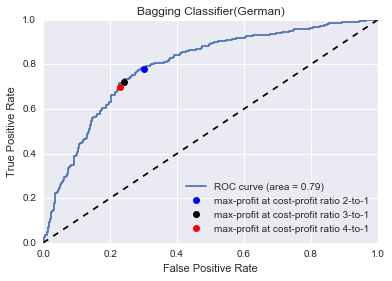

,Highest Scoring Model,Threshold,Unit_Profit,TPR,FPR
cost-profit ratio 2-to-1,Bagging Classifier at 0.65,0.65,369,0.78,0.30
cost-profit ratio 3-to-1,Bagging Classifier at 0.68,0.68,289,0.72,0.24
cost-profit ratio 4-to-1,Bagging Classifier at 0.69,0.69,220,0.70,0.23


In [97]:
#generate ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y1, bag_probs)  
roc_auc = auc(fpr, tpr)
print '\n\n              AUC ROC curve: %f' % roc_auc
pylab.clf()
pylab.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pylab.plot(fprs[0], tprs[0], 'bo', label='max-profit at cost-profit ratio 2-to-1')
pylab.plot(fprs[1], tprs[1], 'ko', label='max-profit at cost-profit ratio 3-to-1')
pylab.plot(fprs[2], tprs[2], 'ro', label='max-profit at cost-profit ratio 4-to-1')
pylab.plot([0, 1], [0, 1], 'k--')
pylab.xlim([0.0, 1.0])
pylab.ylim([0.0, 1.0])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('Bagging Classifier(German)')
pylab.legend(loc="lower right")
pylab.show()

indx = ['cost-profit ratio 2-to-1', 'cost-profit ratio 3-to-1', 'cost-profit ratio 4-to-1']
df1 = pd.DataFrame(zip(mdls, thrs, prfs, tprs, fprs), index=indx, 
                   columns=['Highest Scoring Model', 'Threshold', 'Unit_Profit', 'TPR', 
                            'FPR'])
df1


              AUC ROC curve: 0.932736


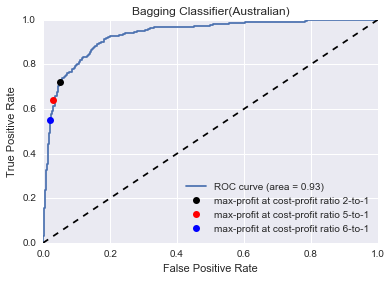

,Highest Scoring Model,Threshold,Unit_Profit,TPR,FPR
cost-profit ratio 2-to-1,Bagging Classifier at 0.64,0.64,185,0.72,0.05
cost-profit ratio 5-to-1,Bagging Classifier at 0.68,0.68,132,0.64,0.03
cost-profit ratio 6-to-1,Bagging Classifier at 0.75,0.75,122,0.55,0.02


In [98]:
#generate ROC curve
fpr, tpr, thresholds = roc_curve(y2, bag_probs2)  
roc_auc = auc(fpr, tpr)
print '\n              AUC ROC curve: %f' % roc_auc
pylab.clf()
pylab.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pylab.plot(fprs2[0], tprs2[0], 'ko', label='max-profit at cost-profit ratio 2-to-1')
pylab.plot(fprs2[1], tprs2[1], 'ro', label='max-profit at cost-profit ratio 5-to-1')
pylab.plot(fprs2[2], tprs2[2], 'bo', label='max-profit at cost-profit ratio 6-to-1')
pylab.plot([0, 1], [0, 1], 'k--')
pylab.xlim([0.0, 1.0])
pylab.ylim([0.0, 1.0])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('Bagging Classifier(Australian)')
pylab.legend(loc="lower right")
pylab.show()

indx = ['cost-profit ratio 2-to-1', 'cost-profit ratio 5-to-1', 'cost-profit ratio 6-to-1']
df2 = pd.DataFrame(zip(mdls2, thrs2, prfs2, tprs2, fprs2), index=indx, 
                   columns=['Highest Scoring Model', 'Threshold', 'Unit_Profit', 'TPR', 
                            'FPR'])
df2

In [99]:
indx = ['as cost-profit ratio increases', 'as cost-profit ratio decreases']
a = ['remains the same or increases', 'remains the same or decreases'] 
b = ['decreases', 'increases']
df3 = pd.DataFrame(zip(a,b), index=indx, columns=['probability threshold for finding\
 highest unit profit', 'maximum unit profit'])
df3

,probability threshold for finding highest unit profit,maximum unit profit
as cost-profit ratio increases,remains the same or increases,decreases
as cost-profit ratio decreases,remains the same or decreases,increases


In [100]:
c = ['remains the same or decreases', 'remains the same or increases']
df4 = pd.DataFrame(zip(c), index=indx, columns=['TPR/FPR, or point on the AUC curve \
representing the maximum unit profit'])
df4

,"TPR/FPR, or point on the AUC curve representing the maximum unit profit"
as cost-profit ratio increases,remains the same or decreases
as cost-profit ratio decreases,remains the same or increases
